In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

# Feature (MFCC) extraction (Dataset generation)

In [2]:
# run this function if you need to generate a csv data set from scratch
# data_loader.generate_csv_dataset()
data_loader.generate_csv_dataset(use_vad=False, use_delta_mfcc=True)


{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
INFO: n_fft=8192
{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}


100%|██████████| 1440/1440 [05:58<00:00,  4.01it/s]


--- Data loaded. Loading time: 358.760550737381 seconds ---
X.shape =  (1440, 160)
y.shape =  (1440, 1)
ID.shape =  (1440, 1)


('data/feature_mfcc_delta_nfft_8192.csv', 'data/y_labels.csv', 'data/IDs.csv')

# Loading Dataset

In [3]:
# X, y, ID = data_loader.load_dataset()
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv', 
#                                     y_path='data/y_labels_16384.csv',
#                                     ID_path='data/IDs_16384.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_32768.csv', 
#                                     y_path='data/y_labels_32768.csv',
#                                     ID_path='data/IDs_32768.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192_vad.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096_vad.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

X, y, ID = data_loader.load_dataset(X_path='data/feature_mfcc_delta_nfft_8192.csv', 
                                    y_path='data/y_labels.csv',
                                    ID_path='data/IDs.csv')

# ID['0'].unique()    # actors
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
# print(len(X_k_folds))

data loaded in 0.07107234001159668ms
          0         1         2         3         4         5         6  \
0 -1.259565  0.303245  0.565729  0.740472  1.017606  0.699541  0.550410   
1 -1.144492  0.379439  0.232604  1.296038  1.095464  0.638897  1.003694   
2 -1.141867  0.700402  0.522715  0.791756  0.681143  0.763471  0.922431   
3 -1.031300  0.594298  0.625426  0.629341  0.822605  1.055398  0.968384   
4 -1.403440  0.651892  0.679810  1.128613  1.029886  0.903193  0.635654   

          7         8         9  ...       150       151       152       153  \
0  1.071940 -0.849060 -0.520171  ... -1.360810 -1.176683 -1.233669 -1.228320   
1  0.734590 -0.893826  0.024751  ... -1.322311 -1.076111 -1.188581 -1.263011   
2  0.755122 -0.665206 -0.840375  ... -1.133402 -1.235013 -1.284283 -1.208774   
3  0.114641 -0.775879 -0.686340  ... -0.837659 -0.985374 -1.026528 -1.188088   
4  0.903227 -0.334770 -0.974429  ... -1.183625 -1.250943 -1.302879 -1.219364   

        154       155       156

# GridSearch SVM-RBF

In [10]:
# del UAR_surf, UAR_list

In [4]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


UAR = 0.326
C = 0.100000, gamma = 0.000316


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


UAR = 0.328
C = 0.100000, gamma = 0.000527


100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


UAR = 0.333
C = 0.100000, gamma = 0.000880


100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


UAR = 0.354
C = 0.100000, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  3.53it/s]


UAR = 0.371
C = 0.100000, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


UAR = 0.376
C = 0.100000, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


UAR = 0.372


100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


UAR = 0.350


100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


UAR = 0.300


100%|██████████| 5/5 [00:01<00:00,  3.31it/s]


UAR = 0.207


100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


UAR = 0.326


100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


UAR = 0.342


100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


UAR = 0.356


100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


UAR = 0.380
C = 0.187382, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  3.80it/s]


UAR = 0.395
C = 0.187382, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  3.84it/s]


UAR = 0.390


100%|██████████| 5/5 [00:01<00:00,  3.70it/s]


UAR = 0.393


100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


UAR = 0.367


100%|██████████| 5/5 [00:01<00:00,  3.35it/s]


UAR = 0.309


100%|██████████| 5/5 [00:01<00:00,  3.22it/s]


UAR = 0.206


100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


UAR = 0.344


100%|██████████| 5/5 [00:01<00:00,  3.62it/s]


UAR = 0.361


100%|██████████| 5/5 [00:01<00:00,  3.81it/s]


UAR = 0.392


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


UAR = 0.401
C = 0.351119, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  3.94it/s]


UAR = 0.411
C = 0.351119, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


UAR = 0.420
C = 0.351119, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  3.97it/s]


UAR = 0.406


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


UAR = 0.401


100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


UAR = 0.342


100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


UAR = 0.208


100%|██████████| 5/5 [00:01<00:00,  3.69it/s]


UAR = 0.371


100%|██████████| 5/5 [00:01<00:00,  3.79it/s]


UAR = 0.401


100%|██████████| 5/5 [00:01<00:00,  4.03it/s]


UAR = 0.406


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


UAR = 0.416


100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


UAR = 0.426
C = 0.657933, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.37it/s]


UAR = 0.431
C = 0.657933, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


UAR = 0.428


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


UAR = 0.418


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


UAR = 0.390


100%|██████████| 5/5 [00:01<00:00,  3.22it/s]


UAR = 0.293


100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


UAR = 0.404


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


UAR = 0.406


100%|██████████| 5/5 [00:01<00:00,  4.26it/s]


UAR = 0.420


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


UAR = 0.439
C = 1.232847, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  4.67it/s]


UAR = 0.455
C = 1.232847, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


UAR = 0.451


100%|██████████| 5/5 [00:01<00:00,  4.24it/s]


UAR = 0.447


100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


UAR = 0.437


100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


UAR = 0.350


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


UAR = 0.416


100%|██████████| 5/5 [00:01<00:00,  4.42it/s]


UAR = 0.427


100%|██████████| 5/5 [00:01<00:00,  4.69it/s]


UAR = 0.439


100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


UAR = 0.464
C = 2.310130, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  4.94it/s]


UAR = 0.467
C = 2.310130, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


UAR = 0.463


100%|██████████| 5/5 [00:01<00:00,  3.86it/s]


UAR = 0.460


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


UAR = 0.443


100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


UAR = 0.414


100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


UAR = 0.347


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  4.65it/s]


UAR = 0.442


100%|██████████| 5/5 [00:01<00:00,  4.94it/s]


UAR = 0.464


100%|██████████| 5/5 [00:00<00:00,  5.10it/s]


UAR = 0.471
C = 4.328761, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  4.97it/s]


UAR = 0.471
C = 4.328761, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


UAR = 0.462


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


UAR = 0.444


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


UAR = 0.346


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


UAR = 0.454


100%|██████████| 5/5 [00:00<00:00,  5.03it/s]


UAR = 0.464


100%|██████████| 5/5 [00:00<00:00,  5.19it/s]


UAR = 0.474
C = 8.111308, gamma = 0.000880


100%|██████████| 5/5 [00:00<00:00,  5.30it/s]


UAR = 0.473


100%|██████████| 5/5 [00:01<00:00,  4.94it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


UAR = 0.460


100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


UAR = 0.450


100%|██████████| 5/5 [00:01<00:00,  3.21it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  3.08it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


UAR = 0.346


100%|██████████| 5/5 [00:00<00:00,  5.08it/s]


UAR = 0.469


100%|██████████| 5/5 [00:00<00:00,  5.14it/s]


UAR = 0.475
C = 15.199111, gamma = 0.000527


100%|██████████| 5/5 [00:00<00:00,  5.34it/s]


UAR = 0.470


100%|██████████| 5/5 [00:00<00:00,  5.33it/s]


UAR = 0.460


100%|██████████| 5/5 [00:01<00:00,  4.99it/s]


UAR = 0.467


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


UAR = 0.461


100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


UAR = 0.445


100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


UAR = 0.346


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


UAR = 0.475


100%|██████████| 5/5 [00:00<00:00,  5.46it/s]


UAR = 0.462


100%|██████████| 5/5 [00:00<00:00,  5.38it/s]


UAR = 0.456


100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


UAR = 0.454


100%|██████████| 5/5 [00:01<00:00,  4.87it/s]


UAR = 0.458


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


UAR = 0.455


100%|██████████| 5/5 [00:01<00:00,  3.53it/s]


UAR = 0.445


100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.08it/s]


UAR = 0.346


100%|██████████| 5/5 [00:00<00:00,  5.49it/s]


UAR = 0.454


100%|██████████| 5/5 [00:00<00:00,  5.12it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


UAR = 0.452


100%|██████████| 5/5 [00:00<00:00,  5.20it/s]


UAR = 0.457


100%|██████████| 5/5 [00:01<00:00,  4.75it/s]


UAR = 0.451


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


UAR = 0.445


100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


UAR = 0.346


100%|██████████| 5/5 [00:00<00:00,  5.21it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  5.29it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  5.22it/s]


UAR = 0.445


100%|██████████| 5/5 [00:00<00:00,  5.15it/s]


UAR = 0.443


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


UAR = 0.451


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


UAR = 0.445


100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

UAR = 0.346
UAR_best = 0.475, C_best = 15.199111, gamma_best = 0.000527


## Result visualization

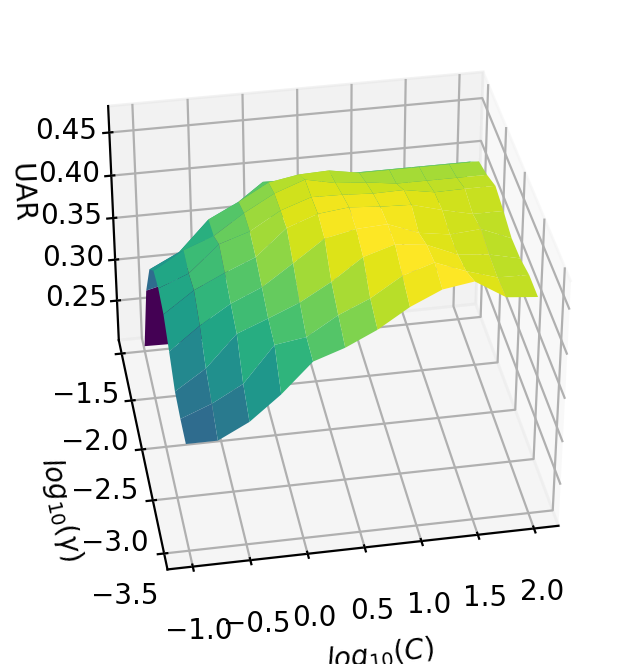

In [5]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
# image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
# fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

# Confusion matrix

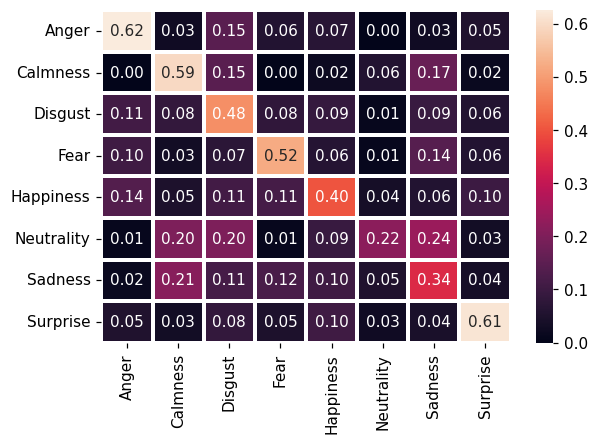

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [6]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)